In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
        


In [4]:
np.random.seed(12345)
class_a_mean = -1.5
class_a_sigma = 1
class_b_mean = 2.5
class_b_sigma = 0.80

population_class_a = 1000
population_class_b = 1000

class_a = np.random.normal(class_a_mean, class_a_sigma, population_class_a)
class_b = np.random.normal(class_b_mean, class_b_sigma, population_class_b)

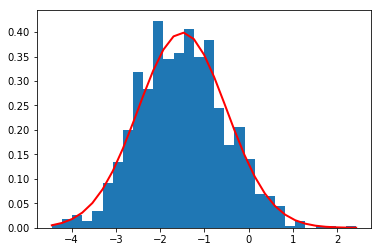

In [5]:
count, bins, ignored = plt.hist(class_a, 30, normed=True)
plt.plot(bins, 1/(class_a_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - class_a_mean)**2 / (2 * class_a_sigma**2) ), linewidth=2, color='r')
plt.show()

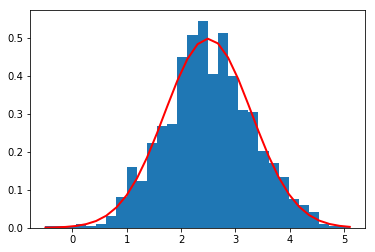

In [6]:
count, bins, ignored = plt.hist(class_b, 30, normed=True)
plt.plot(bins, 1/(class_b_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - class_b_mean)**2 / (2 * class_b_sigma**2) ), linewidth=2, color='r')
plt.show()

In [7]:
sample_size = 100

feature_a_0 = np.random.choice(class_a, size = sample_size) / 0.35
feature_a_1 = np.random.choice(class_a, size = sample_size) + 0.20
label_a = np.repeat(1, sample_size)
sample_a = np.concatenate(([feature_a_0],[feature_a_1],[label_a]),axis=0)

feature_b_0 = np.random.choice(class_b, size = sample_size)
feature_b_1 = np.random.choice(class_b, size = sample_size)
label_b = np.repeat(-1, sample_size)
sample_b = np.concatenate(([feature_b_0],[feature_b_1],[label_b]),axis=0)

dataset = np.column_stack((sample_a,sample_b))

np.savetxt("data-separable.csv", dataset.T,fmt='%1.4f',
           delimiter=',' , comments='',
           header="feature_0,feature_0,class_label")

In [8]:
dataset.shape

(3, 200)

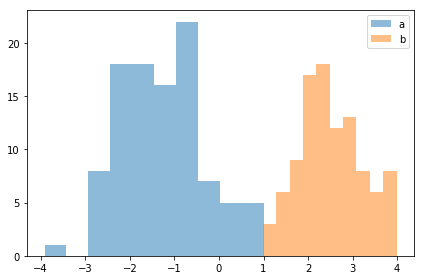

In [9]:
plt.hist(sample_a[1], alpha=0.5, label='a')
plt.hist(sample_b[1], alpha=0.5, label='b')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

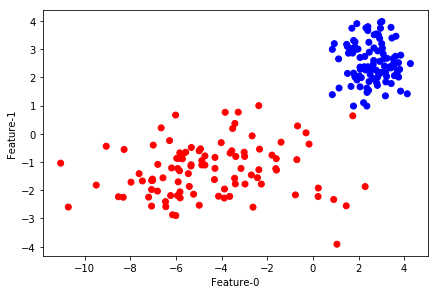

In [10]:
colors = ['r' if i==1 else 'b' for i in dataset[2]]
plt.scatter(dataset[0], dataset[1], c = colors)
plt.tight_layout()
plt.xlabel('Feature-0')
plt.ylabel('Feature-1')
plt.show()

In [11]:
X = dataset[:2].T
y = dataset[2]
ppn = Perceptron(eta=0.45, n_iter=10)
ppn.fit(X, y)

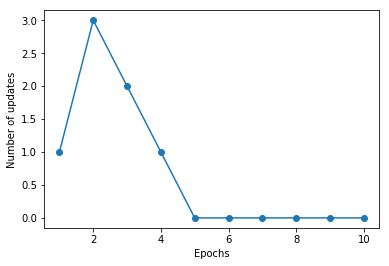

In [12]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [13]:
print("*** Rate Errors per Epochs *** \
      \n _____________________\
    \n| No. Errors | Epochs | \
    \n _____________________")
for i,e in enumerate(ppn.errors_):
    print( "|      " + str(e) + "     |    " + str(i) + "   |")
print("_____________________")

*** Rate Errors per Epochs ***       
 _____________________    
| No. Errors | Epochs |     
 _____________________
|      1     |    0   |
|      3     |    1   |
|      2     |    2   |
|      1     |    3   |
|      0     |    4   |
|      0     |    5   |
|      0     |    6   |
|      0     |    7   |
|      0     |    8   |
|      0     |    9   |
_____________________


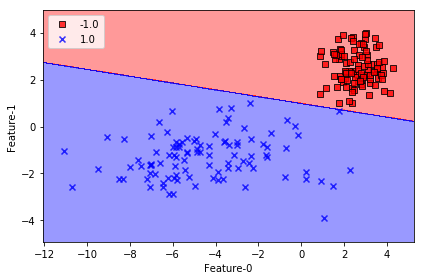

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Feature-0')
plt.ylabel('Feature-1')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

* Create your own small dataset (at least 10 examples) that is not linearly seperable. 
* Now train a Perceptron model. 
* Did the algorithm converge? Provide evidence.

In [15]:
sample_size = 100

feature_a_0 = 5 + np.random.choice(class_a, size = sample_size) 
feature_a_1 = 2 + np.random.choice(class_a, size = sample_size) * 2
label_a = np.repeat(1, sample_size)
sample_a = np.concatenate(([feature_a_0],[feature_a_1],[label_a]),axis=0)

feature_b_0 = np.random.choice(class_b, size = sample_size) 
feature_b_1 = np.random.choice(class_b, size = sample_size) + 0.5
label_b = np.repeat(-1, sample_size)
sample_b = np.concatenate(([feature_b_0],[feature_b_1],[label_b]),axis=0)

dataset = np.column_stack((sample_a,sample_b))

np.savetxt("data-non-separable.csv", dataset.T,fmt='%1.4f',
           delimiter=',' , comments='',
           header="feature_0,feature_0,class_label")

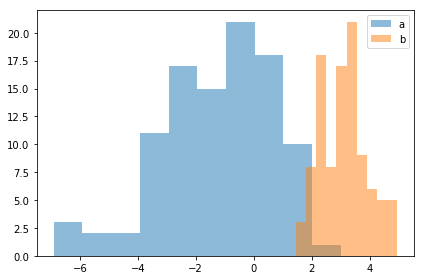

In [16]:
plt.hist(sample_a[1], alpha=0.5, label='a')
plt.hist(sample_b[1], alpha=0.5, label='b')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

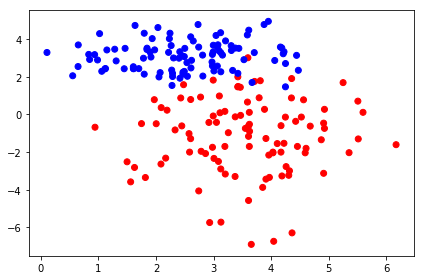

In [17]:
colors = ['r' if i==1 else 'b' for i in dataset[2]]
plt.scatter(dataset[0], dataset[1], c = colors)
plt.tight_layout()
plt.show()

In [18]:
X = dataset[:2].T
y = dataset[2]
ppn = Perceptron(eta=0.45, n_iter=10)
ppn.fit(X, y)

In [19]:
print("| No. Errors | Epochs |")
for i,e in enumerate(ppn.errors_):
    print( "|      " + str(e) + "     |    " + str(i) + "   |")

| No. Errors | Epochs |
|      1     |    0   |
|      4     |    1   |
|      4     |    2   |
|      2     |    3   |
|      3     |    4   |
|      2     |    5   |
|      2     |    6   |
|      4     |    7   |
|      3     |    8   |
|      2     |    9   |


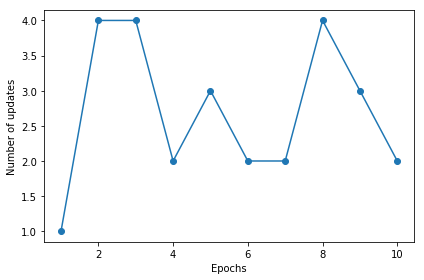

In [20]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from numpy.random import seed
import numpy as np

In [22]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [23]:
train = open("train.csv")
train = train.readlines()
train = [ item.replace('""',"") for item in train ]
train = [ item.split("\"") for item in train ]
train = [ item[0][:-1] + item[2] for item in train[1:] ]
train = [ item.split(",")[:7] + item.split(",")[8:] for item in train ]
train = [ b",".join(i.encode() for i in item) for item in train ]

train = np.genfromtxt(train, delimiter=",",
                     dtype=[('passengerid', '<i8'), ('survived', '<i8'), ('pclass', '<i8'),
                            ('sex', '|S1'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'),
                            ('fare', '<f8'), ('cabin', '|S1'), ('embarked', 'S1')],
                     names=['passengerid', 'survived', 'pclass', 'sex', 'age',
                            'sibsp', 'parch', 'fare', 'cabin', 'embarked'])

sex_classes, train['sex'] = np.unique(train['sex'], return_inverse=True)
cabin_classes, train['cabin'] = np.unique(train['cabin'], return_inverse=True)
embarked_classes, train['embarked'] = np.unique(train['embarked'], return_inverse=True)

train = train.astype([  ('passengerid', '<i8'), ('survived', '<i8'), ('pclass', '<i8'),
                        ('sex', '<i8'), ('age', '<f8'), ('sibsp', '<i8'), ('parch', '<i8'),
                        ('fare', '<f8'), ('cabin', '<i8'), ('embarked', '<i8')])

colnames = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked']

for feature in colnames:
    train[feature] = np.where(np.isnan(train[feature]), np.nanmean(train[feature], axis=0), train[feature])

In [46]:
len(colnames)

8

In [24]:
pred = np.array([train['pclass'], train['sex'], train['age'], train['sibsp'], train['parch'], train['fare'], train['cabin'], train['embarked']])
pred = pred.transpose()
pred0 = normalize(pred)

passengerId = train['passengerid']
train_target = train['survived']

X_train0, X_test0,\
y_train0, y_test0,\
idx_train0, idx_test0 = train_test_split(pred0, train_target, 
                                       passengerId, test_size = 0.3, 
                                       train_size= 0.7)

In [25]:
ada0 = AdalineSGD(n_iter = 100, eta = 0.0001)
ada0.fit(X_train0, y_train0)

In [26]:
pred0 = ada0.predict(X_test0)
mse0 = mean_squared_error(y_pred = pred0, y_true = y_test0)
cost0 = ada0.cost_[-1]

0.60074626865671643

In [28]:
pred = np.array([train['age'], train['pclass'], train['sex'], train['fare']])
pred = pred.transpose()
pred1 = normalize(pred)
passengerId = train['passengerid']
train_target = train['survived']

X_train1, X_test1,\
y_train1, y_test1,\
idx_train1, idx_test1 = train_test_split(pred1, train_target, 
                                       passengerId, test_size = 0.3, 
                                       train_size= 0.7)

In [29]:
ada1 = AdalineSGD(n_iter = 100, eta = 0.0001)
ada1.fit(X_train1, y_train1)

In [30]:
ada1 = AdalineSGD(n_iter = 100, eta = 0.0001)
ada1.fit(X_train1, y_train1)
pred1 = ada1.predict(X_test1)
mse1 = mean_squared_error(y_pred = pred1, y_true = y_test1)
cost1 = ada1.cost_[-1]

0.61194029850746268

In [32]:
pred = np.array([train['age'], train['pclass']])
pred = pred.transpose()
pred2 = normalize(pred)
passengerId = train['passengerid']
train_target = train['survived']

X_train2, X_test2,\
y_train2, y_test2,\
idx_train2, idx_test2 = train_test_split(pred2, train_target, 
                                       passengerId, test_size = 0.3, 
                                       train_size= 0.7)

In [33]:
ada2 = AdalineSGD(n_iter = 100, eta = 0.0001)
ada2.fit(X_train2, y_train2)
pred2 = ada2.predict(X_test2)
mse2 = mean_squared_error(y_pred = pred2, y_true = y_test2)
cost2 = ada2.cost_[-1]

In [36]:
pred = np.array([train['pclass'], train['sex']])

pred = pred.transpose()
pred3 = normalize(pred)

passengerId = train['passengerid']
train_target = train['survived']

X_train3, X_test3,\
y_train3, y_test3,\
idx_train3, idx_test3 = train_test_split(pred3, train_target, 
                                       passengerId, test_size = 0.3, 
                                       train_size= 0.7)

In [37]:
ada3 = AdalineSGD(n_iter = 100, eta = 0.0001)
ada3.fit(X_train3, y_train3)
pred3 = ada3.predict(X_test3)
mse3 = mean_squared_error(y_pred = pred3, y_true = y_test3)
cost3 = ada3.cost_[-1]

In [40]:
pred = np.array([train['age'], train['fare']])
pred = pred.transpose()
pred4 = normalize(pred)
passengerId = train['passengerid']
train_target = train['survived']

X_train4, X_test4,\
y_train4, y_test4,\
idx_train4, idx_test4 = train_test_split(pred4, train_target, 
                                       passengerId, test_size = 0.3, 
                                       train_size= 0.7)

In [41]:
ada4 = AdalineSGD(n_iter = 100, eta = 0.0001)
ada4.fit(X_train4, y_train4)
pred4 = ada4.predict(X_test4)
mse4 = mean_squared_error(y_pred = pred4, y_true = y_test4)
cost4 = ada4.cost_[-1]

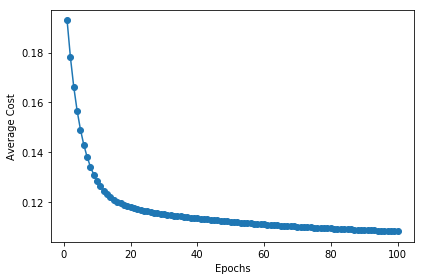

In [54]:
plt.plot(range(1, len(ada4.cost_) + 1), ada4.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()